In [12]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Read datasets

In [2]:
dataset = Dataset('/network/home/barinpvi/sea_level/globalTWL_baseline.nc')

In [6]:
dataset.variables.keys()

odict_keys(['longitude', 'latitude', 'RSLR', 'TL', 'EV', 'TWL', 'percentile'])

In [3]:
def get_variables(f):
    dataset = Dataset(f)

    longitude = dataset.variables['longitude'][:]
    latitude = dataset.variables['latitude'][:]
    rslr = dataset.variables['RSLR'][:]
    tl = dataset.variables['TL'][:]
    ev = dataset.variables['EV'][:]
    twl = dataset.variables['TWL'][:]
    percentile = dataset.variables['percentile'][:]
    
    return longitude, latitude, rslr, tl, ev, twl, percentile

In [4]:
longitude, latitude, rslr, tl, ev, twl, percentile = get_variables('/network/home/barinpvi/sea_level/globalTWL_baseline.nc')

In [5]:
longitude_45, latitude_45, rslr_45, tl_45, ev_45, twl_45, percentile_45 = get_variables('/network/home/barinpvi/sea_level/globalTWL_RCP45.nc')

In [6]:
longitude_85, latitude_85, rslr_85, tl_85, ev_85, twl_85, percentile_85 = get_variables('/network/home/barinpvi/sea_level/globalTWL_RCP85.nc')

In [22]:
rel_45_2100 = twl_45[:, 1, 9] - twl[:, 1] # unity: meters 

In [32]:
rel_45_2050 = twl_45[:, 1, 4] - twl[:, 1] # unity: meters 

In [33]:
rel_85_2100 = twl_85[:, 1, 9] - twl[:, 1] # unity: meters 

In [34]:
rel_85_2050 = twl_85[:, 1, 4] - twl[:, 1] # unity: meters 

(array([2304., 6226., 5454., 3859., 1805.,  759.,  275.,  160.,    9.,
          14.]),
 array([0.80357906, 1.62081561, 2.43805216, 3.25528872, 4.07252527,
        4.88976182, 5.70699837, 6.52423492, 7.34147147, 8.15870803,
        8.97594458]),
 <a list of 10 Patch objects>)

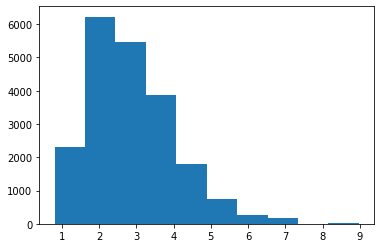

In [52]:
plt.hist(twl_45[:, 1, 9])

(array([2612., 6440., 5540., 3553., 1636.,  693.,  285.,   79.,   13.,
          14.]),
 array([0.33446589, 1.15094962, 1.96743336, 2.78391709, 3.60040083,
        4.41688456, 5.2333683 , 6.04985203, 6.86633577, 7.6828195 ,
        8.49930324]),
 <a list of 10 Patch objects>)

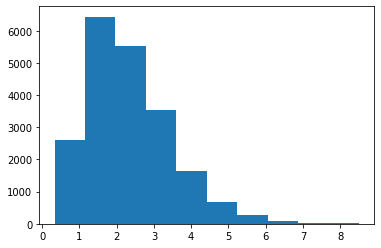

In [53]:
plt.hist(twl[:, 1])

(array([6.3000e+01, 3.8000e+01, 3.4000e+01, 3.1300e+02, 4.9730e+03,
        1.3689e+04, 1.6200e+03, 1.1700e+02, 9.0000e+00, 9.0000e+00]),
 array([-0.43278052, -0.24729562, -0.06181073,  0.12367417,  0.30915906,
         0.49464395,  0.68012885,  0.86561374,  1.05109864,  1.23658353,
         1.42206842]),
 <a list of 10 Patch objects>)

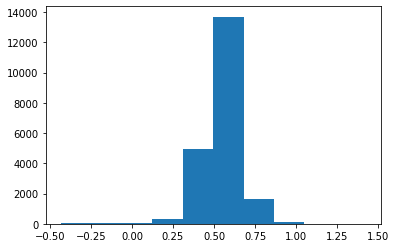

In [23]:
plt.hist(rel_45_2100)

In [28]:
# Check that lats and lons are the same for all datasets

In [41]:
np.where(latitude != latitude_45)

(array([], dtype=int64),)

In [42]:
d = {'longitude': longitude, 'latitude': latitude, 'twl_4.5_2050': rel_45_2050, 'twl_4.5_2100': rel_45_2100, 'twl_8.5_2050': rel_85_2050, 'twl_8.5_2100': rel_85_2100}

In [43]:
df = pd.DataFrame(data=d)

In [45]:
df.head()

,longitude,latitude,twl_4.5_2050,twl_4.5_2100,twl_8.5_2050,twl_8.5_2100
0,180.000000,-16.152930,0.074617,0.421424,0.280209,0.998572
1,179.762811,-16.216590,0.074617,0.421424,0.280209,0.998572
2,179.523658,-16.266118,0.074617,0.421424,0.280209,0.998572
3,179.311343,-16.393551,0.131297,0.466664,0.283337,0.995813
4,179.067616,-16.445738,0.172086,0.514159,0.292090,1.008119


In [7]:
d_total = {'longitude': longitude, 'latitude': latitude, 'twl_4.5_2050': twl_45[:, 1, 4], 'twl_4.5_2100': twl_45[:, 1, 9], 'twl_8.5_2050': twl_85[:, 1, 4], 'twl_8.5_2100': twl_85[:, 1, 9]}

In [10]:
df_total = pd.DataFrame(data=d_total)

In [15]:
df_total.head()

,longitude,latitude,twl_4.5_2050,twl_4.5_2100,twl_8.5_2050,twl_8.5_2100
0,180.000000,-16.152930,2.408321,2.755128,2.613913,3.332276
1,179.762811,-16.216590,2.408321,2.755128,2.613913,3.332276
2,179.523658,-16.266118,2.408321,2.755128,2.613913,3.332276
3,179.311343,-16.393551,2.430962,2.766329,2.583002,3.295478
4,179.067616,-16.445738,2.528641,2.870714,2.648645,3.364674


# Save dataframe to pickle file

In [49]:
outfile = open('sea_level.pkl','wb')

pickle.dump(df, outfile)
outfile.close()

In [24]:
def savePickle(f_name, df):
    outfile = open(f_name,'wb')

    pickle.dump(df, outfile)
    outfile.close()

In [25]:
savePickle("absolute_sea_level.pkl", df_total)

# Read pickle file

In [26]:
infile = open('absolute_sea_level.pkl','rb')
new_dict = pickle.load(infile)

In [27]:
new_dict.head()

,longitude,latitude,twl_4.5_2050,twl_4.5_2100,twl_8.5_2050,twl_8.5_2100
0,180.000000,-16.152930,2.408321,2.755128,2.613913,3.332276
1,179.762811,-16.216590,2.408321,2.755128,2.613913,3.332276
2,179.523658,-16.266118,2.408321,2.755128,2.613913,3.332276
3,179.311343,-16.393551,2.430962,2.766329,2.583002,3.295478
4,179.067616,-16.445738,2.528641,2.870714,2.648645,3.364674
